## Task 3: Linear Regression

* Objective: Implement and understand simple & multiple linear regression.
* Tools: Scikit-learn, Pandas, Matplotlib

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [137]:
data = pd.read_csv("Housing.csv")

In [138]:
df = pd.DataFrame(data)
print(df.head(15))

       price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0   13300000   7420         4          2        3      yes        no       no   
1   12250000   8960         4          4        4      yes        no       no   
2   12250000   9960         3          2        2      yes        no      yes   
3   12215000   7500         4          2        2      yes        no      yes   
4   11410000   7420         4          1        2      yes       yes      yes   
5   10850000   7500         3          3        1      yes        no      yes   
6   10150000   8580         4          3        4      yes        no       no   
7   10150000  16200         5          3        2      yes        no       no   
8    9870000   8100         4          1        2      yes       yes      yes   
9    9800000   5750         3          2        4      yes       yes       no   
10   9800000  13200         3          1        2      yes        no      yes   
11   9681000   6000         

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Checking of Null values

In [140]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Duplicate Data

In [141]:
df.duplicated().sum()

np.int64(0)

Check for Garbage Value

In [142]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("****"*10)

mainroad
yes    468
no      77
Name: count, dtype: int64
****************************************
guestroom
no     448
yes     97
Name: count, dtype: int64
****************************************
basement
no     354
yes    191
Name: count, dtype: int64
****************************************
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
****************************************
airconditioning
no     373
yes    172
Name: count, dtype: int64
****************************************
prefarea
no     417
yes    128
Name: count, dtype: int64
****************************************
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64
****************************************


## Encoding

In [143]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

categorical_columns = ['mainroad', 'guestroom', 'basement',
                       'hotwaterheating', 'airconditioning',
                       'prefarea', 'furnishingstatus']

le = LabelEncoder()
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


## EDA of Data

In [144]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [145]:
df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


Histogram

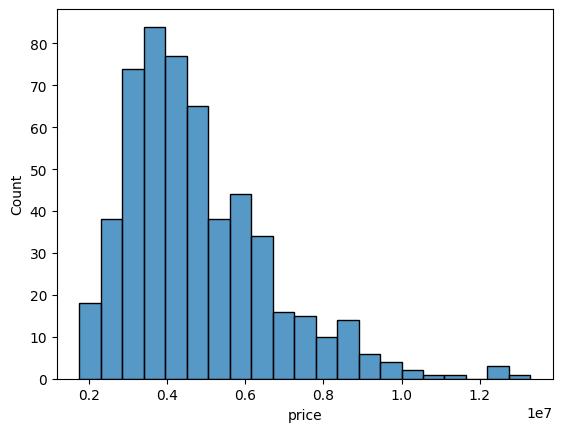

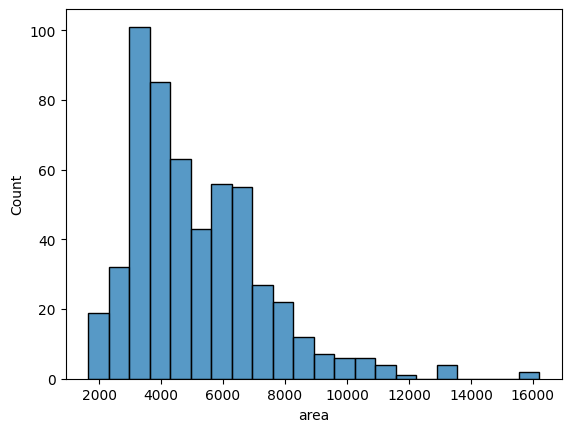

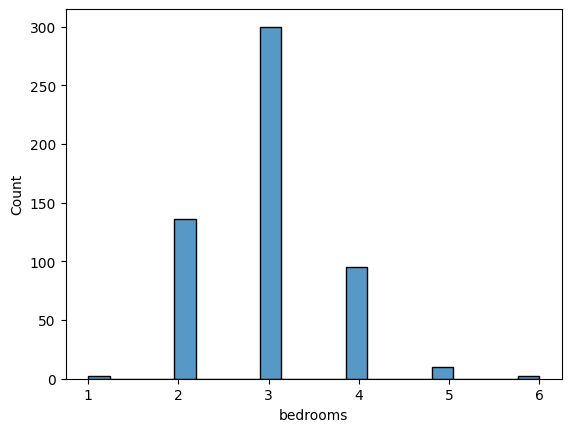

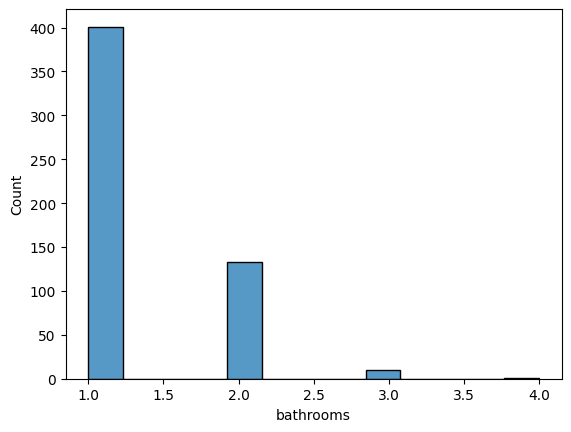

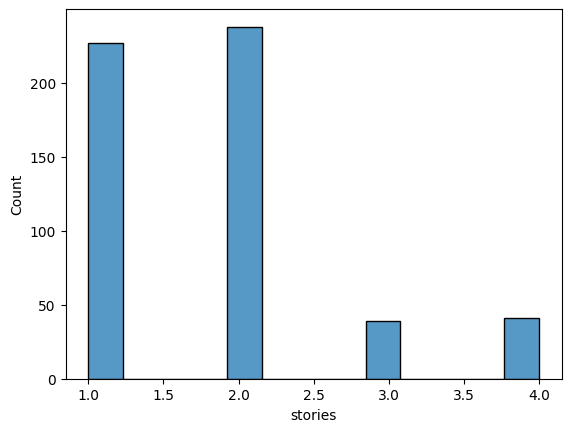

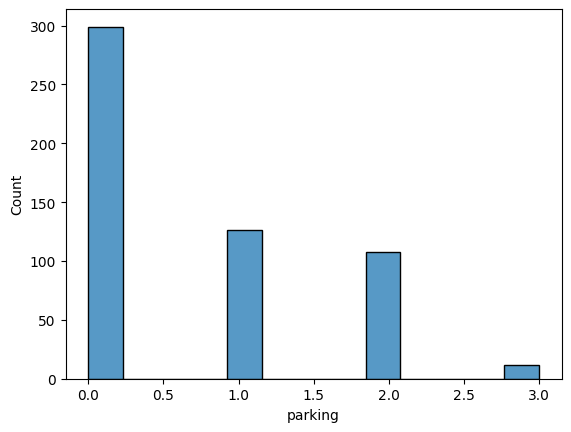

In [146]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df, x=i)
    plt.show()
    

Barplot

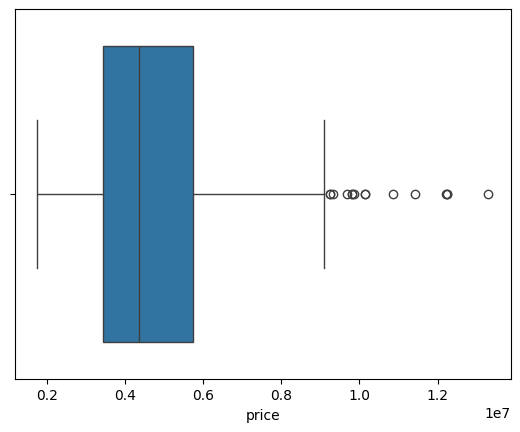

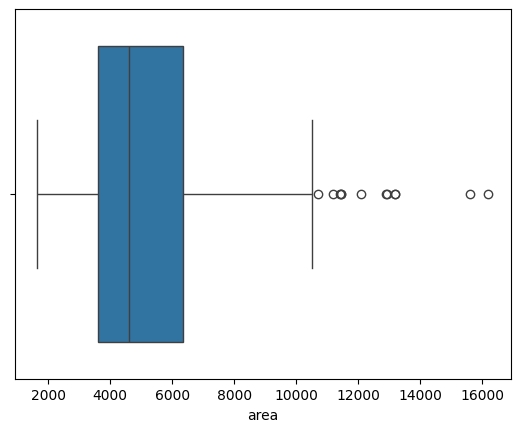

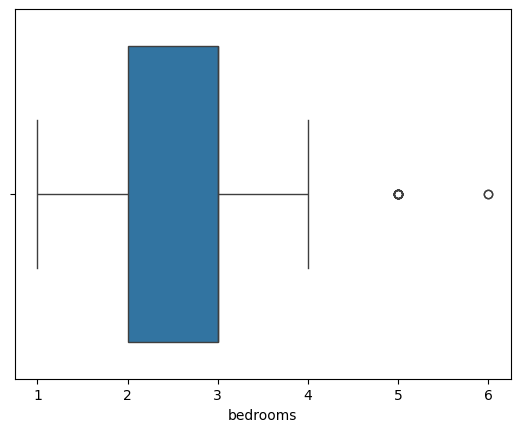

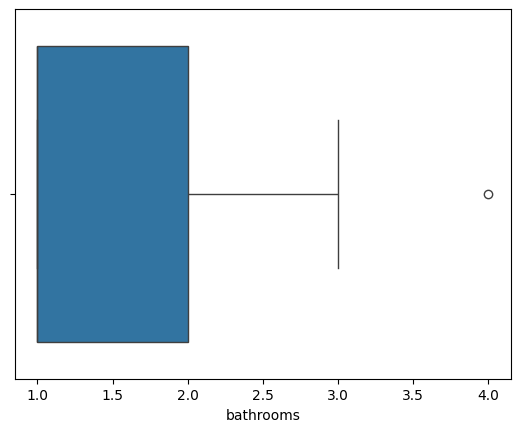

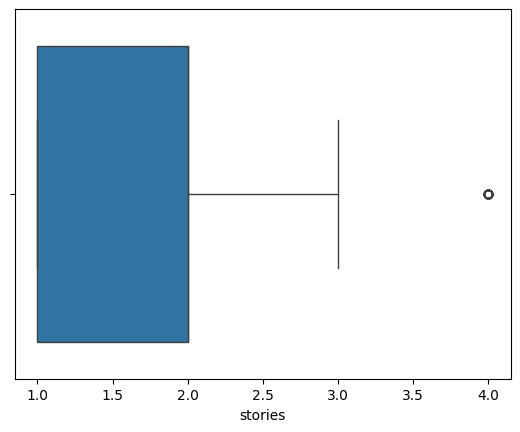

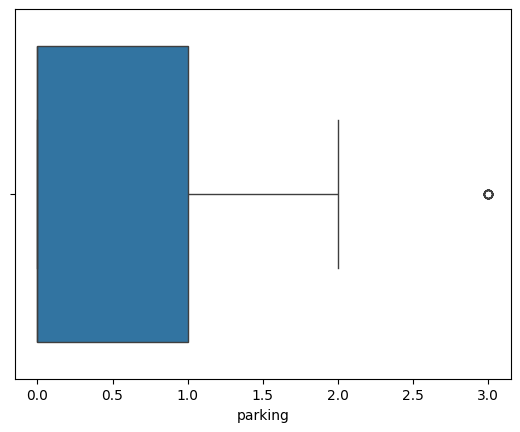

In [147]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [148]:
df_encoded.select_dtypes(include='number').columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

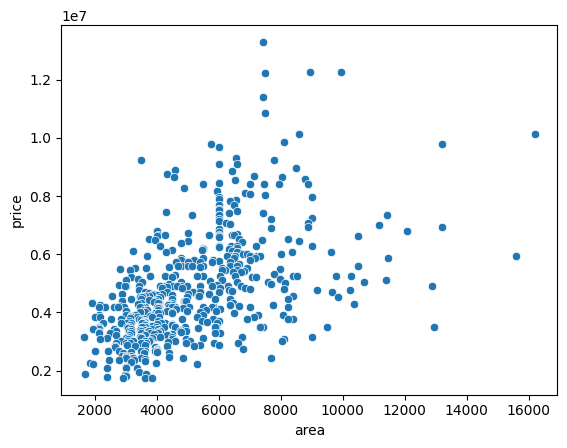

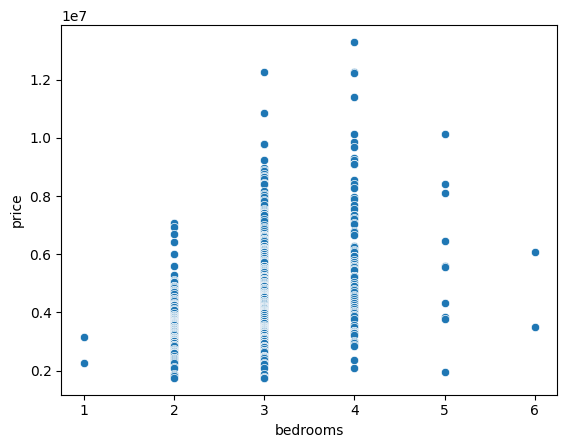

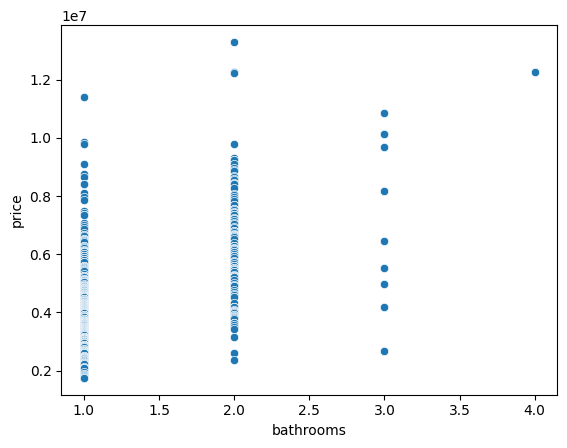

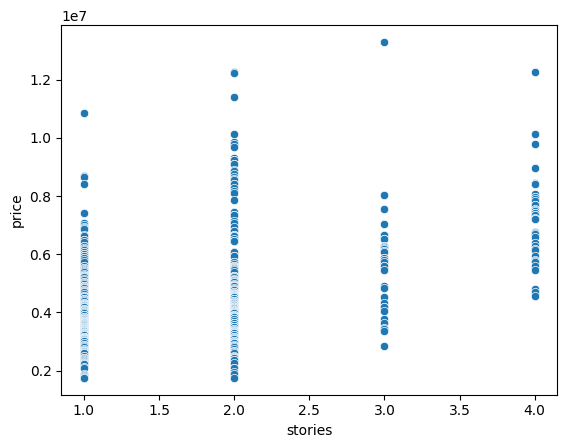

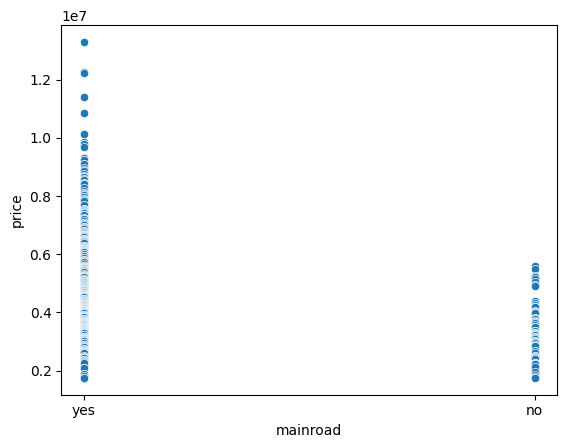

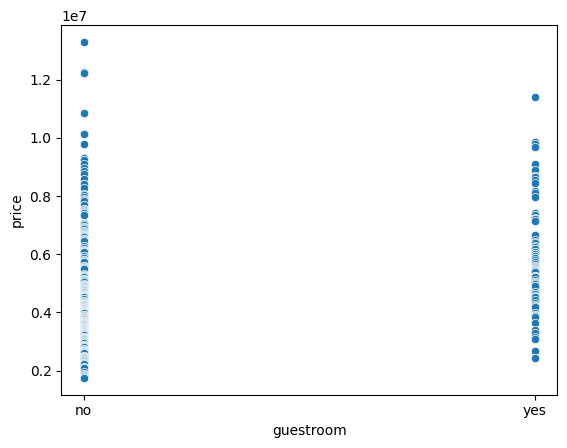

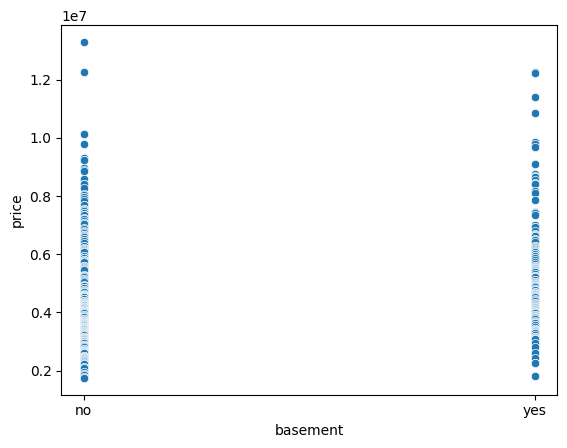

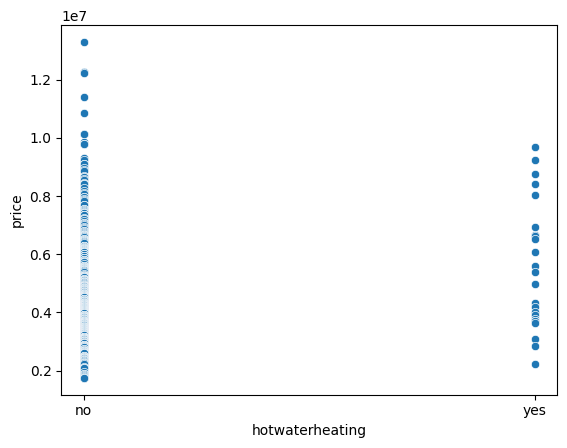

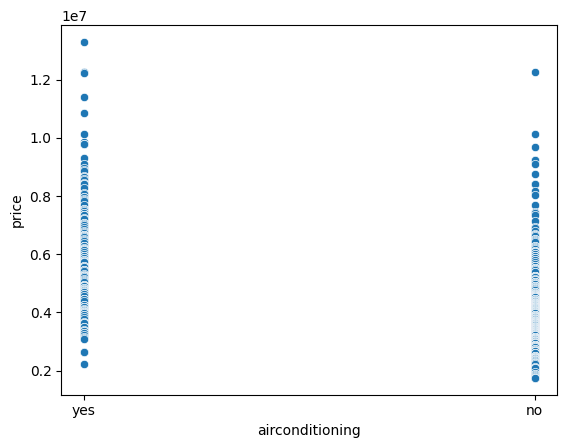

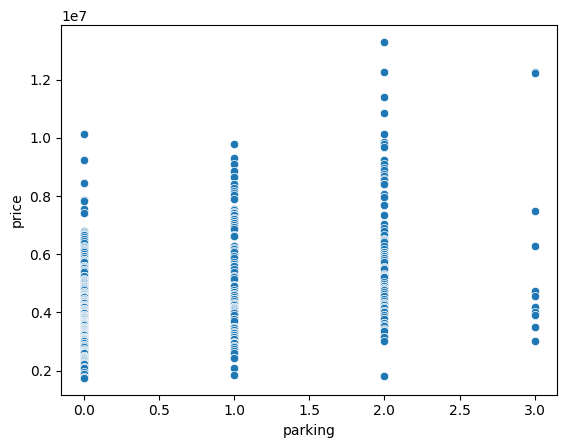

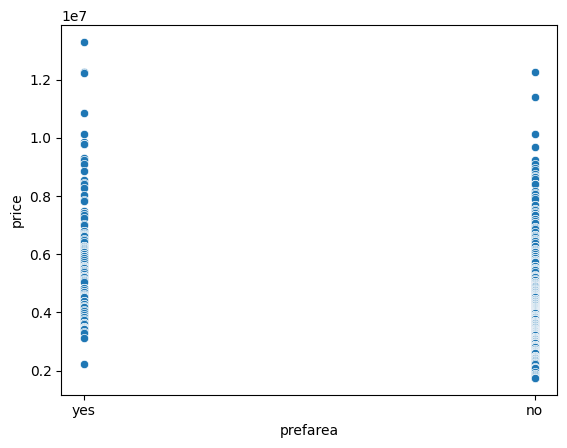

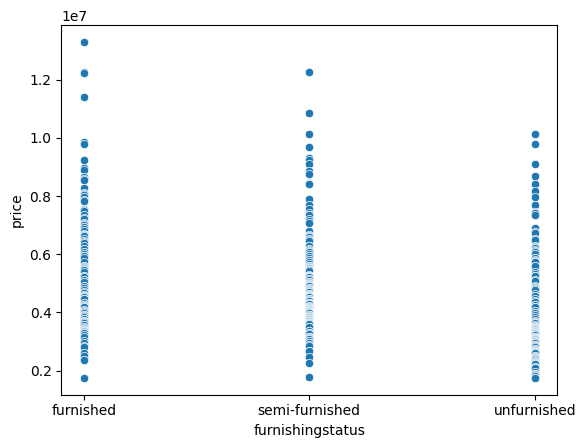

In [149]:
for i in ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']:
    sns.scatterplot(data=df, x=i, y='price')
    plt.show()

In [150]:
corr_data = df_encoded.select_dtypes(include='number').corr()

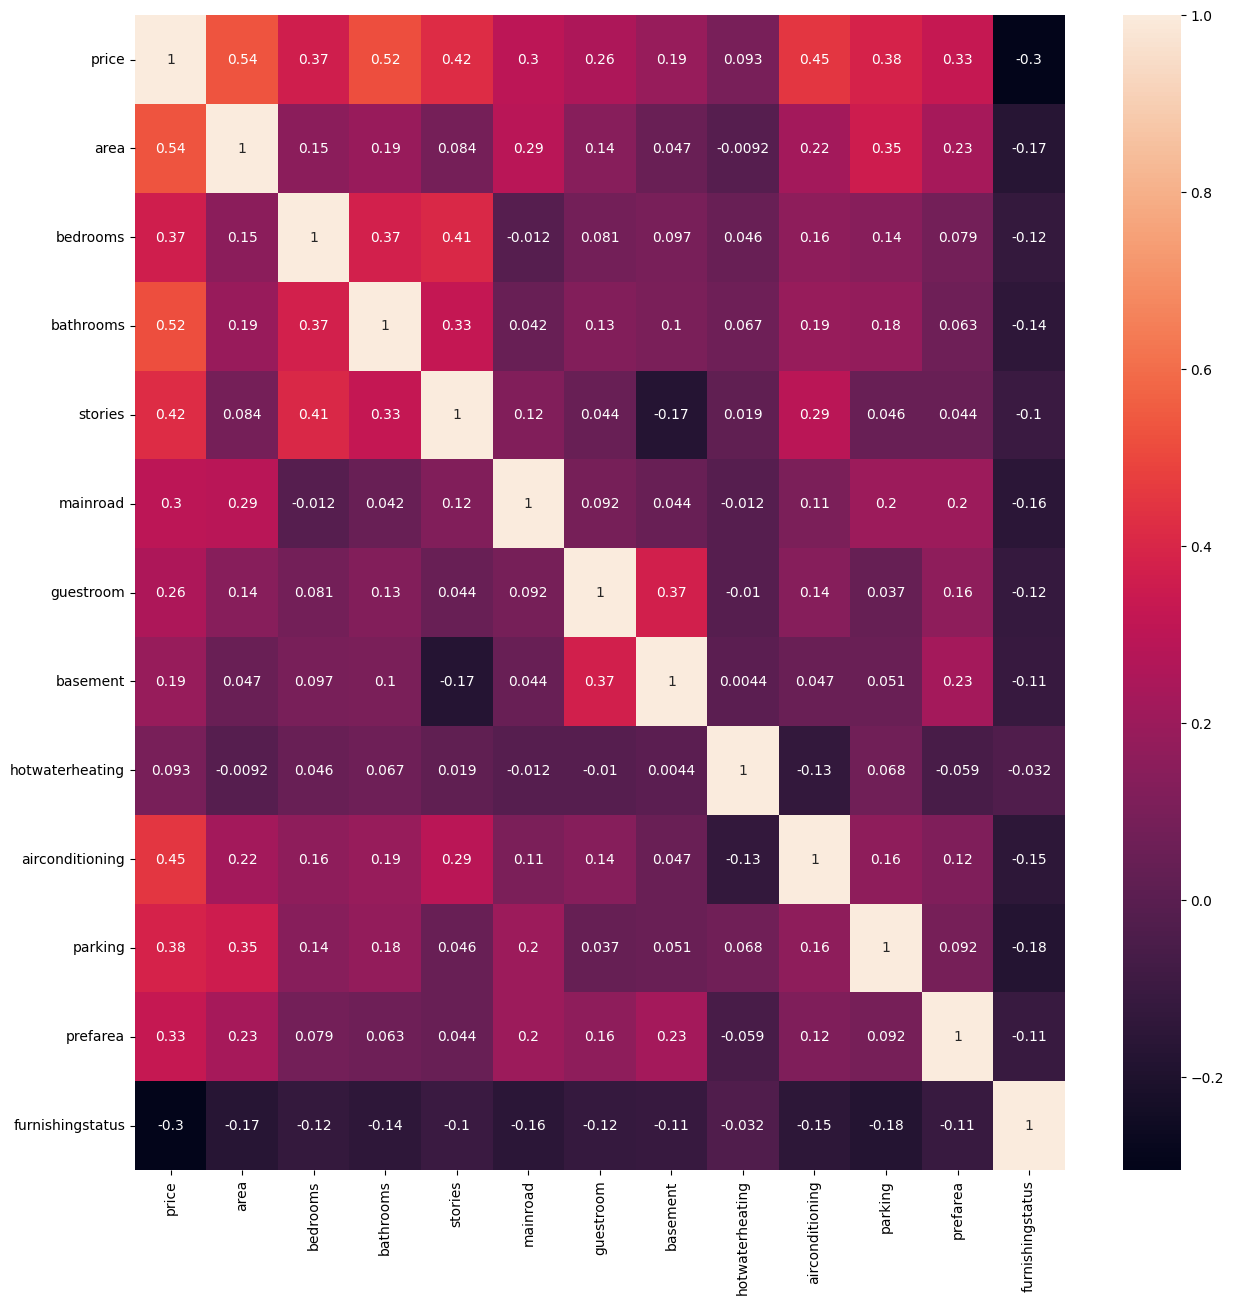

In [151]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_data,annot=True)
plt.show()

Split data into train-test sets.

In [152]:
X = df_encoded.drop('price',axis=1)
Y = df_encoded['price']

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [154]:
X_test.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,5136.128440,2.990826,1.366972,1.899083,0.862385,0.174312,0.321101,0.027523,0.348624,0.724771,0.238532,1.110092
std,2037.340787,0.700468,0.587848,0.902106,0.346086,0.381130,0.469056,0.164357,0.478736,0.891021,0.428155,0.797443
min,1700.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3480.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4990.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,13200.000000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [155]:
X_train.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,5154.144495,2.958716,1.266055,1.782110,0.857798,0.178899,0.357798,0.050459,0.307339,0.685780,0.233945,1.059633
std,2204.313664,0.747804,0.477391,0.858093,0.349658,0.383708,0.479903,0.219141,0.461921,0.854941,0.423824,0.752696
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


## LinearRegression

In [156]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Evaluating model using MAE, MSE, R².

In [157]:
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 979679.6912959905
Mean Squared Error (MSE): 1771751116594.0347
R² Score: 0.6494754192267804


Plot regression line and interpret coefficients.

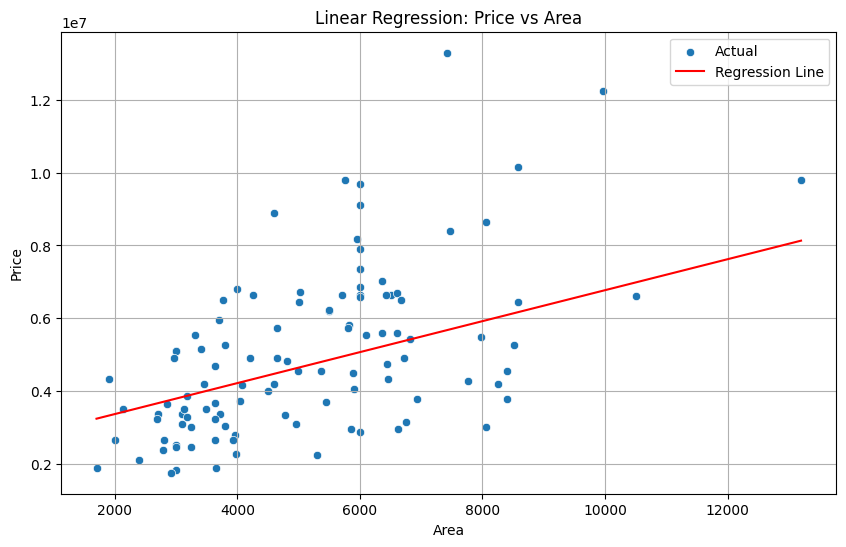

In [158]:
feature = 'area'
simple_model = LinearRegression()
simple_model.fit(X_train[[feature]], y_train)
y_line = simple_model.predict(X_test[[feature]])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[feature], y=y_test, label="Actual")
sns.lineplot(x=X_test[feature], y=y_line, color='red', label="Regression Line")
plt.title("Linear Regression: Price vs Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

## Actual Price vs Predicted Price

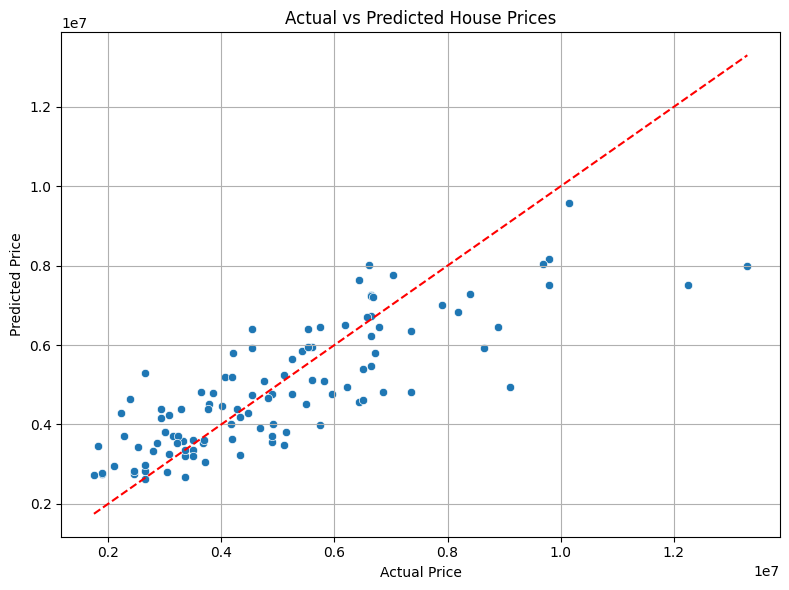

In [159]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()